# Machine Learning Approach
which has been achieved using Logistic Regression

In [82]:
import pandas as pd
import numpy as np
import warnings
import sys
import matplotlib.pyplot as plt
import csv
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [38]:
def fetch_file(filename):                                           #function to fetch a file and return a list of reviews.
    try:
        with open(filename) as f:                          # or , encoding=utf8
            return [line.rstrip() for line in f if line.rstrip()]
    except IOError:
        print("Error File Does Not Exist")
        return []

In [2]:
df = pd.read_csv('Amazon_unlocked_Mobile.csv')

df

,Rating,Review
0,5,I feel so LUCKY to have found this used (phone...
1,4,"nice phone, nice up grade from my pantach revu..."
2,5,Very pleased
3,4,It works good but it goes slow sometimes but i...
4,4,Great phone to replace my lost phone. The only...
5,1,I already had a phone with problems... I know ...
6,2,The charging port was loose. I got that solder...
7,2,"Phone looks good but wouldn't stay charged, ha..."
8,5,I originally was using the Samsung S2 Galaxy f...
9,3,It's battery life is great. It's very responsi...


In [3]:
df.dropna(inplace=True)                #Dropping empty cells if there are any.

In [4]:
df = df[df['Rating']!=3]               #Dropping reviews with rating =3

In [5]:
df

,Rating,Review
0,5,I feel so LUCKY to have found this used (phone...
1,4,"nice phone, nice up grade from my pantach revu..."
2,5,Very pleased
3,4,It works good but it goes slow sometimes but i...
4,4,Great phone to replace my lost phone. The only...
5,1,I already had a phone with problems... I know ...
6,2,The charging port was loose. I got that solder...
7,2,"Phone looks good but wouldn't stay charged, ha..."
8,5,I originally was using the Samsung S2 Galaxy f...
11,5,This is a great product it came after two days...


In [18]:
df['Polarity'] = np.where(df['Rating'] > 3, 1,0)


In [19]:
df

,Rating,Review,Polarity
0,5,I feel so LUCKY to have found this used (phone...,1
1,4,"nice phone, nice up grade from my pantach revu...",1
2,5,Very pleased,1
3,4,It works good but it goes slow sometimes but i...,1
4,4,Great phone to replace my lost phone. The only...,1
5,1,I already had a phone with problems... I know ...,0
6,2,The charging port was loose. I got that solder...,0
7,2,"Phone looks good but wouldn't stay charged, ha...",0
8,5,I originally was using the Samsung S2 Galaxy f...,1
11,5,This is a great product it came after two days...,1


In [20]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, Y_test = train_test_split(df['Review'], df['Polarity'], random_state=0)

In [21]:
X_train[20]

'The battery was old & had been over used because it barely holds a charge. Otherwise, no issues with the phone itself.'

In [22]:
X_train[100]

'excelente'

In [23]:
X_train.shape

(286511,)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(X_train)

In [30]:
vect.get_feature_names()[::2000]

['00',
 '3the',
 'acdc',
 'aplicaciones',
 'battety',
 'burla',
 'cingularproxy',
 'corazon',
 'demás',
 'droid',
 'ev',
 'flaps',
 'goe',
 'hmmmmmmm',
 'insuperable',
 'lad',
 'managerbackupbrowsercalculatorcalendarcaller',
 'mounted',
 'occassionaly',
 'peasy',
 'predecessor',
 'rambo',
 'responsebest',
 'sections',
 'sneer',
 'suit',
 'thrall',
 'undesired',
 'vã',
 'yeahhhh']

In [31]:
len(vect.get_feature_names())

58585

In [32]:
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<286511x58585 sparse matrix of type '<class 'numpy.int64'>'
	with 7545211 stored elements in Compressed Sparse Row format>

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(X_train_vectorized, Y_train)

In [34]:
from sklearn.metrics import roc_auc_score
# Any words in X_test that didn't appeared in X_train will be ignored 
predictions = model.predict(vect.transform(x_test))
roc_auc_score(Y_test, predictions)

0.9196515067774634

In [35]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

234662

In [36]:
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(X_train_vectorized, Y_train)

predictions = model.predict(vect.transform(x_test))

print('AUC: ', roc_auc_score(Y_test, predictions))

AUC:  0.9612978343834118


In [37]:
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]


In [64]:
Lines = fetch_file("dataset.txt")
Lines[0]

'This is amazing powerful and beautiful fon from oppo best camera, battery, design, display, sound quality, processor'

In [65]:
pos_count = 0
neg_count = 0

for i in range(0, len(Lines)):
    flag = int(model.predict(vect.transform([Lines[i]])))
    if(flag == 1):
        pos_count = pos_count+1
    else:
        neg_count = neg_count+1
        
print(pos_count, neg_count)

138 52


In [66]:
positive_polarity = (pos_count/(pos_count + neg_count))
print("Positive Polarity: ", positive_polarity)
negative_polarity = (neg_count/(pos_count + neg_count))
print("Negative Polarity: ", negative_polarity)

Positive Polarity:  0.7263157894736842
Negative Polarity:  0.2736842105263158


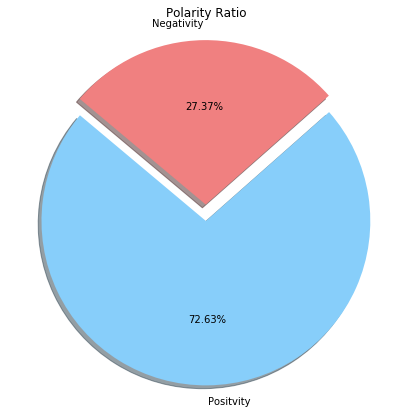

In [67]:
labels = 'Positvity', 'Negativity'
sizes = [(positive_polarity*100), (negative_polarity*100)]
explode = (0, 0.1)  
colours = ['lightskyblue', 'lightcoral']

fig1, ax1 = plt.subplots()
fig = plt.gcf() ########################################################
fig.set_size_inches(7,7)
ax1.pie(sizes, colors=colours, explode=explode, labels=labels, autopct='%1.2f%%',  shadow=True, startangle=140)
ax1.axis('equal') 
ax1.set_title("Polarity Ratio")

plt.show()

In [71]:
positive_list = []

with open('pos_words.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        positive_list.append(row)

negative_list = []

with open('neg_words.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        negative_list.append(row)
        

In [83]:

for i in range(0,len(Lines)):
    Lines[i] = Lines[i].lower()

stop_wordset = set(stopwords.words('english'))
stop_wordset.add('.')  #Add more symbols and numbers to remove from the data.
stop_wordset #180 wordset



Tokens = [] #List of words for CountVectorization

for i in range(0,len(Lines)):
    
    word_tokens = word_tokenize(Lines[i]) 
  
    filtered_sentence = [w for w in word_tokens if not w in stop_wordset] 
  
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_wordset: 
            filtered_sentence.append(w)
            Tokens.append(w)
    print(word_tokens) 
    print(filtered_sentence)
    
    
from sklearn.feature_extraction.text import CountVectorizer
    
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(Tokens)
Bag_of_Words = list(vectorizer.vocabulary_)

['this', 'is', 'amazing', 'powerful', 'and', 'beautiful', 'fon', 'from', 'oppo', 'best', 'camera', ',', 'battery', ',', 'design', ',', 'display', ',', 'sound', 'quality', ',', 'processor']
['amazing', 'powerful', 'beautiful', 'fon', 'oppo', 'best', 'camera', ',', 'battery', ',', 'design', ',', 'display', ',', 'sound', 'quality', ',', 'processor']
['i', 'bought', 'this', 'device', 'on', 'release', 'date', 'itself', 'im', 'loving', 'it', 'i', 'just', 'want', 'to', 'say', 'cons', 'bcoz', 'it', 'has', 'lot', 'of', 'pros', ',', 'rear', 'camera', 'should', 'improve', 'a', 'little', 'bit', 'it', 'produces', 'over', 'saturation', 'images', 'and', 'their', 'is', 'no', 'eis', 'i', 'hope', 'they', 'will', 'fix', 'that', 'via', 'ota', 'update']
['bought', 'device', 'release', 'date', 'im', 'loving', 'want', 'say', 'cons', 'bcoz', 'lot', 'pros', ',', 'rear', 'camera', 'improve', 'little', 'bit', 'produces', 'saturation', 'images', 'eis', 'hope', 'fix', 'via', 'ota', 'update']
['i', 'just', 'got', '

In [84]:
pos_bag = []
neg_bag = []
other_bag = []

for i in range(0,len(Bag_of_Words)):
    if [Bag_of_Words[i]] in positive_list:
        pos_bag.append(Bag_of_Words[i])

        
    if [Bag_of_Words[i]] in negative_list:
        neg_bag.append(Bag_of_Words[i])
        
    else:
        other_bag.append(Bag_of_Words[i])

Positive words


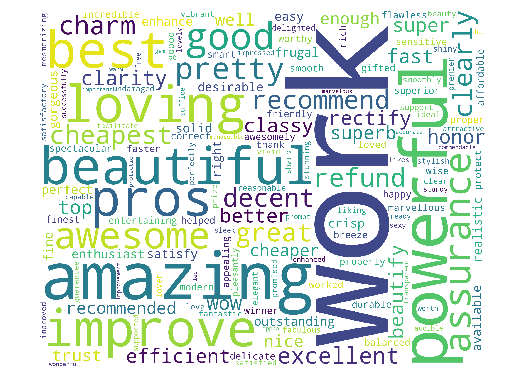

Negative words


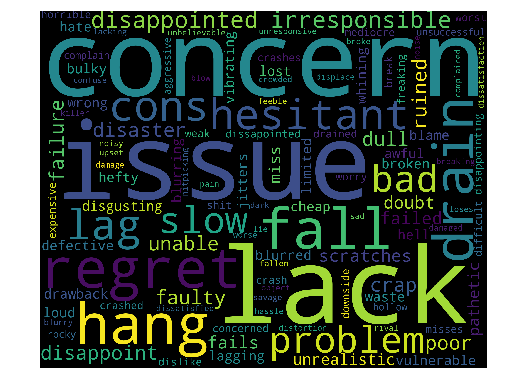

Neutral words


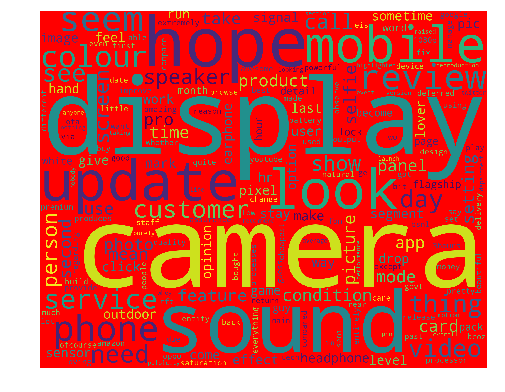

In [87]:
from wordcloud import WordCloud,STOPWORDS

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(8, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(pos_bag,'white')
print("Negative words")
wordcloud_draw(neg_bag)
print("Neutral words")
wordcloud_draw(other_bag, 'red')
